# Setup 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from tqdm import trange
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [38]:
df = pd.read_csv('https://github.com/Adkurrr/Sentiment-Analysis-with-Aspect-Based-Approach-on-Spotify-App-with-SVM/blob/main/Dataset/reviews.csv?raw=true', delimiter=',')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


# Praproses Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


### Handling missing value

In [4]:
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [5]:
df.drop('Reply', axis=1, inplace=True)

### Handing duplicated data

In [6]:
df.duplicated().sum()

0

### Lowercase, clear stop words and clear punctuations

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def clean(review):
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [9]:
df['Review'] = df['Review'].apply(clean)
df.head(10)

,Time_submitted,Review,Rating,Total_thumbsup
0,2022-07-09 15:00:00,great music service audio high quality app eas...,5,2
1,2022-07-09 14:21:22,please ignore previous negative rating app sup...,5,1
2,2022-07-09 13:27:32,pop-up get best spotify experience android 12 ...,4,0
3,2022-07-09 13:26:45,really buggy terrible use recently,1,1
4,2022-07-09 13:20:49,dear spotify get songs didnt put playlist shuf...,1,1
5,2022-07-09 13:20:20,player controls sometimes disappear reason app...,3,7
6,2022-07-09 13:19:21,love selection lyrics provided song youre list...,5,0
7,2022-07-09 13:17:22,still extremely slow changing storage external...,3,16
8,2022-07-09 13:16:49,great app best mp3 music app ever used one pro...,5,0
9,2022-07-09 13:11:32,im deleting app following reasons app failing ...,1,318


# Exploratory Data Analysis

### Visualisasi jumlah rating positif, negatif dan netral

In [10]:
df['Rating'].value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

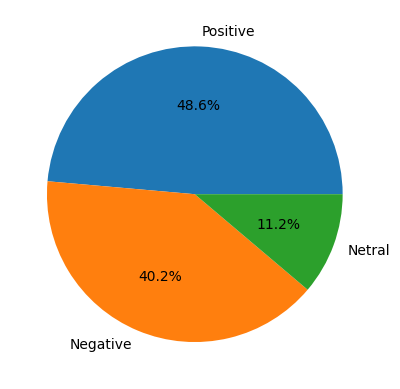

In [11]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    elif rating>0 and rating<3:
        return "Negative"
    else:
        return "Netral"
    
df['Rating'] = df['Rating'].apply(ratings)
plt.pie(df['Rating'].value_counts(), labels=df['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

### mencari kata paling sering muncul

In [15]:
def corpus(text):
    text_list = text.split()
    return text_list

df['Review_lists'] = df['Review'].apply(corpus)
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

mostCommon = Counter(corpus).most_common(10)
mostCommon

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 61594/61594 [00:01<00:00, 35448.03it/s]


[('app', 35591),
 ('music', 25433),
 ('spotify', 18771),
 ('songs', 18217),
 ('song', 14672),
 ('play', 11308),
 ('like', 9760),
 ('listen', 9325),
 ('cant', 9103),
 ('love', 8975)]

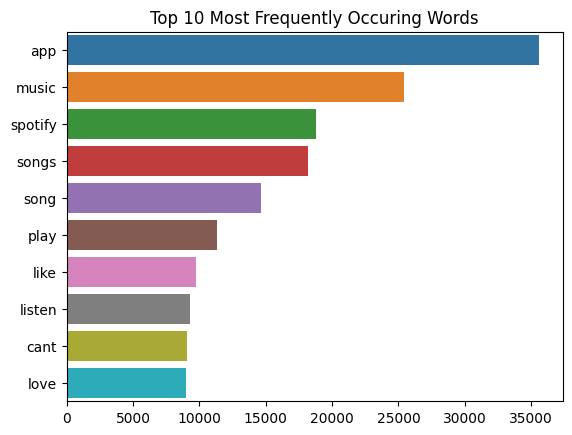

In [18]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### WordCloud

In [ ]:
from wordcloud import WordCloud

word_freq_dict = dict(mostCommon)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Review_lists')
plt.axis('off')
plt.show()

# Model

### Sentimen analisis dengan NLTK

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [ ]:
#sentiment analyze by nltk
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    reviews = row['Review']
    num = i
    res[num] = sia.polarity_scores(reviews)

  0%|          | 0/61594 [00:00<?, ?it/s]

In [ ]:
# Mengubah hasil analisis sentimen menjadi DataFrame
vaders = pd.DataFrame(res).T
vaders["Rating"] = df["Rating"]

# Menambahkan kolom sentimen ke DataFrame asli
def classify_sentiment(row):
    if row['compound'] >= 0.05 and row['Rating'] >= 4:
        return 'positive'
    elif row['compound'] <= -0.05 and row['Rating'] < 3:
        return 'negative'
    elif row['compound'] > -0.05 and row['compound'] < 0.05 and row['Rating'] == 3:
        return 'neutral'
    else:
        return 'neutral'

# Terapkan fungsi classify_sentiment untuk setiap baris
vaders['sentimen'] = vaders.apply(classify_sentiment, axis=1)

# Gabungkan kolom sentimen kembali ke DataFrame asli
df = df.join(vaders[['compound', 'sentimen']])

# Menampilkan DataFrame hasil
print(df)

### TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.5, ngram_range=(1, 1))
features = tfidf.fit_transform(df['Review'].values)
dfuni = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())

dfuni.head()

,000,001,00s,010,05,099,10,100,1000,10000,...,ytm,ytmusic,ytube,yup,z5,zero,zombies,zone,zones,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split data

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

### Build Model Prediction Using SVM